In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random

### Open files with results, analyze the result data with clustering algorithms

In [2]:
with open('C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BayesScores_taste_nowater_alphapoint875.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

import scores from svm with the same train:test splits we used for these things here.

In [3]:
#for laptop, user name = Audrey. Desktop, user name = nasha

In [4]:
A_15_svm_all_tastes_df = pd.read_pickle(
'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/SVM_4tastes_no_water_15split.pkl')

In [5]:
n_neurons = 529

crs = A_15_svm_all_tastes_df[(A_15_svm_all_tastes_df['Signal Type'] == 'post-taste')]['SVM Rate']
post_taste = np.sort(crs)[::-1]

mpstd = np.mean(post_taste[:n_neurons]) + np.std(post_taste[:n_neurons])
good_neuron_scores = [cr for cr in post_taste if cr > mpstd]
bad_neuron_scores = [cr for cr in post_taste if cr not in good_neuron_scores]
pt = A_15_svm_all_tastes_df[(A_15_svm_all_tastes_df['Signal Type'] == 'post-taste')]
pt_n = np.array(pt.iloc[:,0])
pt_svmrate = np.array(pt.iloc[:,2])
pt_n_rate = np.stack((pt_n,pt_svmrate), axis=1)

a_coding_neurons = []
for j in range(n_neurons):
    if pt_n_rate[j][1] in good_neuron_scores:
        a_coding_neurons.append(j)

[]

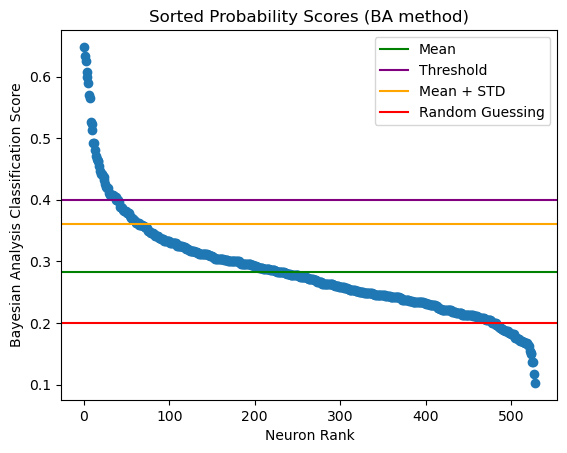

In [6]:
#plot BA scores, sorted with our first threshold line.
sorted_ba = np.sort(neuron_vs_score[:,1])[::-1]

plt.scatter((range(len(sorted_ba))),sorted_ba)
plt.title('Sorted Probability Scores (BA method)')
plt.axhline(y=np.mean(sorted_ba),color='green', label='Mean')
plt.axhline(y=0.4,color='purple', label='Threshold')
plt.axhline(y=(np.mean(sorted_ba) + abs(np.std(sorted_ba))),color='orange', label='Mean + STD')
plt.axhline(y=0.2,color='red', label='Random Guessing')
plt.xlabel('Neuron Rank')
plt.ylabel('Bayesian Analysis Classification Score')
plt.legend(loc = 'upper right')
plt.plot()

[]

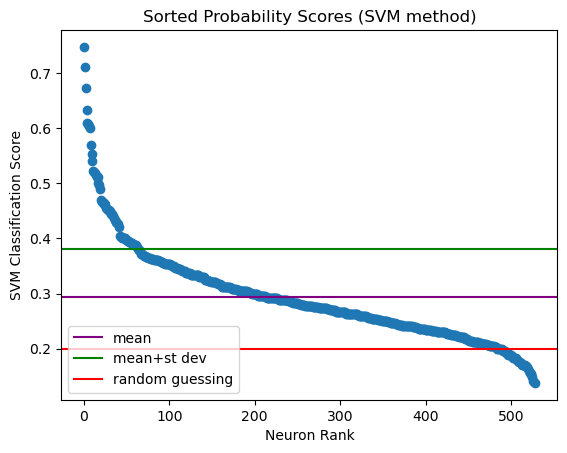

In [7]:
#plot my svm scores in the same sorted way we plotted our bayesian analysis scores
sorted_svm = np.sort(pt_n_rate[:,1])[::-1]

plt.scatter((range(len(sorted_svm))),sorted_svm)
plt.title('Sorted Probability Scores (SVM method)')
plt.axhline(y=np.mean(sorted_svm),color='purple', label='mean')
plt.axhline(y=(np.mean(sorted_svm) + abs(np.std(sorted_svm))),color='green', label='mean+st dev')
plt.axhline(y=0.2,color='red', label='random guessing')
plt.xlabel('Neuron Rank')
plt.ylabel('SVM Classification Score')
plt.legend(loc = 'lower left')
plt.plot()

In [8]:
len(a_coding_neurons)

64

In [9]:
pt

,Neuron,Signal Type,SVM Rate
0,0,post-taste,0.674074
1,1,post-taste,0.370370
2,2,post-taste,0.337037
3,3,post-taste,0.292593
4,4,post-taste,0.270370
...,...,...,...
524,524,post-taste,0.425926
525,525,post-taste,0.600000
526,526,post-taste,0.355556
527,527,post-taste,0.322222


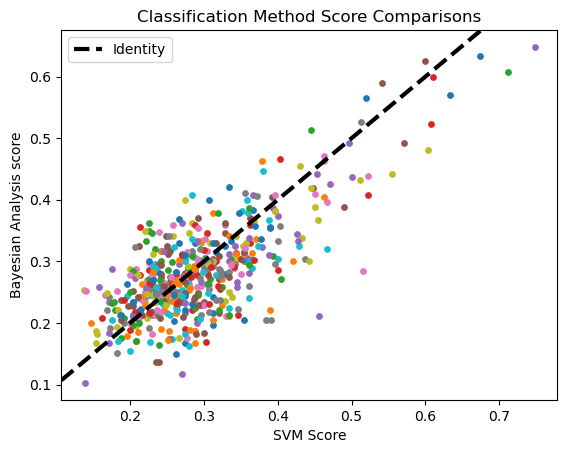

In [10]:
#plot a scatter of my imported svm scores vs the calculated bayes scores
#%matplotlib inline
for i in range(529):
    plt.scatter(pt_n_rate[i,1],neuron_vs_score[i,1], s = 15)
    #label = f"({i})"
    #plt.annotate(label, (input_transformedp[i,0]*100,input_transformedp[i,1]*100), textcoords="offset points", xytext=(0,5),
                # ha='center')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Classification Method Score Comparisons')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, label='Identity')
plt.legend(loc = 'upper left')
plt.show()

## Import Logistic Regression scores

plot all three in interactive 3-d plot, and maybe can see some better correlation here? not sure 

In [11]:
log_reg_scores = pd.read_pickle(
'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/LogReg_Smoothed_Short_Scores_15split.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/LogReg_Smoothed_Short_Scores_15split.pkl'

In [ ]:
log_reg_scores

In [ ]:
from mpl_toolkits import mplot3d
#%matplotlib inline
%matplotlib notebook

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pt_n_rate[:,1],neuron_vs_score[:,1],log_reg_scores.iloc[:,2],color=colors[y_pred])#c=log_reg_scores.iloc[:,2], cmap='Greens')
ax.set_xlabel('SVM score')
ax.set_ylabel('Bayesian analysis score')
ax.set_zlabel('Logistic regression score')

C:\Users\nasha\AppData\Local\Temp\ipykernel_29040\1519180323.py:8: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(radius**2 - X**2 - Y**2)


NameError: name 'log_reg_scores' is not defined

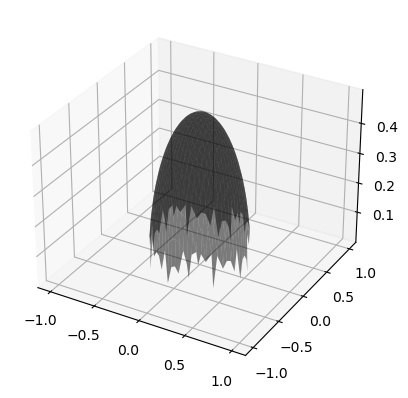

In [12]:
# Create a meshgrid of points
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate the Z values to create a sphere
radius = 0.5
Z = np.sqrt(radius**2 - X**2 - Y**2)


fig = plt.figure()
ax = plt.axes(projection='3d')
contour = ax.plot_surface(X, Y, Z, color='black', alpha=0.5)
ax.scatter3D(pt_n_rate[:,1],neuron_vs_score[:,1],log_reg_scores.iloc[:,2],color=colors[y_pred])#c=log_reg_scores.iloc[:,2], cmap='Greens')

ax.set_xlabel('SVM score')
ax.set_ylabel('Bayesian analysis score')
ax.set_zlabel('Logistic regression score')

In [13]:
%matplotlib inline

In [14]:
#find how many points (and which neurons they correspond to) are outside circle of radius 0.45
import math

def is_point_outside_circle(point, radius):
    x, y, z = point
    distance = math.sqrt(x**2 + y**2 + z**2)
    return distance > radius

def find_points_outside_circle(points, radius):
    outside_points = []
    for i, point in enumerate(points):
        if is_point_outside_circle(point, radius):
            outside_points.append(i)
    return outside_points
points_list = [(pt_n_rate[i,1],neuron_vs_score[i,1],log_reg_scores.iloc[i,2]) for i in range(len(neuron_vs_score))]
radius = 0.5
outside_indices = find_points_outside_circle(points_list, radius) #new list of coding_neurons?


NameError: name 'log_reg_scores' is not defined

In [15]:
len(outside_indices)

NameError: name 'outside_indices' is not defined

### Spectral Clustering

In [16]:
from sklearn.cluster import SpectralClustering

In [17]:
neuron_vs_score[44]

array([44.        ,  0.49259259])

In [18]:
#spectral clustering on the above: lets make it cluster into two clusters: coding neurons and non-coding neurons.
#maybe try k-means clustering too?
SVM_vs_bayes = np.array([[pt_n_rate[i,1], neuron_vs_score[i,1]] for i in range(len(pt_n_rate))])
clustering = SpectralClustering(n_clusters = 3, random_state=0).fit(SVM_vs_bayes)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [19]:
y_pred = clustering.fit_predict(SVM_vs_bayes)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [20]:
from itertools import cycle, islice
colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)

In [21]:
from matplotlib import patches

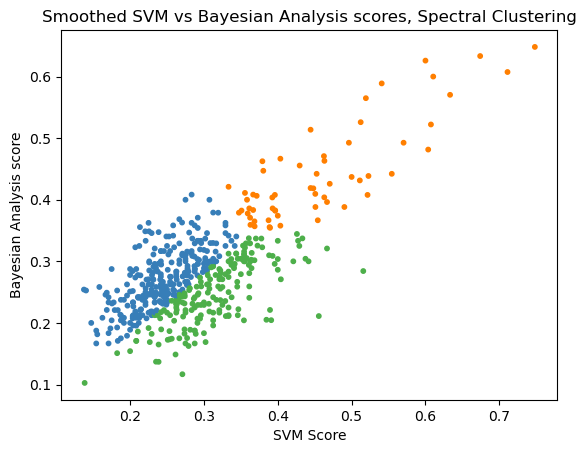

In [22]:
# Add semicircle with line
circle_center = (0.0, 0.0)  # Center of the circle
circle_radius = 0.45  # Radius of the semicircle

theta = np.linspace(0, np.pi/2, 100)
x = circle_center[0] + circle_radius * np.cos(theta)
y = circle_center[1] + circle_radius * np.sin(theta)

#plt.plot(x, y, color='black')  # Plot the semicircle
#plt.axhline(y=circle_center[1], color='black', linestyle='--')  # Plot the line


plt.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=10, color=colors[y_pred])
plt.title('Smoothed SVM vs Bayesian Analysis scores, Spectral Clustering')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')

plt.show()

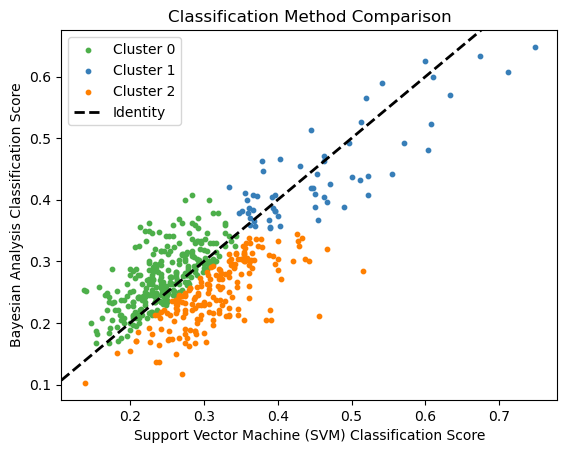

In [23]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate through each cluster and plot them separately
for cluster_label in np.unique(y_pred):
    cluster_indices = y_pred == cluster_label
    cluster_data = SVM_vs_bayes[cluster_indices]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=10, color=colors[cluster_label-1], label=f'Cluster {cluster_label}')

ax.set_title('Classification Method Comparison')
ax.set_xlabel('Support Vector Machine (SVM) Classification Score')
ax.set_ylabel('Bayesian Analysis Classification Score')
#subtitle = "Classification Score Comparison"
#plt.suptitle(subtitle, y=1.02, fontsize=12)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False, label='Identity')

# Add a legend
ax.legend()

plt.show()

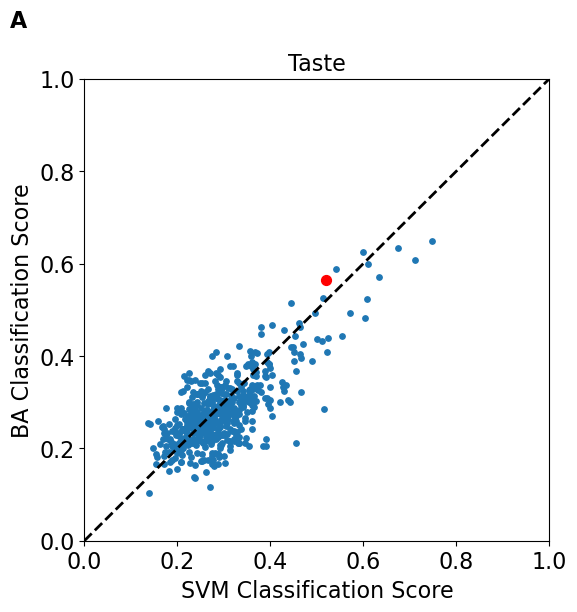

In [26]:
import matplotlib.patches as patches

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6,6))


ax.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=15)#, color=colors[cluster_label-1], label=f'Cluster {cluster_label}')
ax.scatter(SVM_vs_bayes[380,0],SVM_vs_bayes[380,1], s=50, color='r', label='Neuron 380')
ax.text(-0.16, 1.15, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
#ax.set_title('Classification Method Comparison (Taste)')
ax.set_xlabel('SVM Classification Score', fontsize=16)
ax.set_ylabel('BA Classification Score', fontsize=16)
#subtitle = "Classification Score Comparison"
#plt.suptitle(subtitle, y=1.02, fontsize=12)
ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0],labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
ax.set_title('Taste',fontsize = 16)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False, label='Identity')

# Add a legend
#ax.legend()
plt.show()

In [20]:
np.sum((SVM_vs_bayes[:, 0] > 0.2+0.145) & (SVM_vs_bayes[:, 1] > 0.2+0.145))

52

In [ ]:
#how many neurons have greater svm score than Bayesian
condition = SVM_vs_bayes[:, 0] > SVM_vs_bayes[:, 1]

# Count the number of rows that satisfy the condition
count = np.sum(condition)
count

In [21]:
299/529

0.5652173913043478

In [19]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [20]:
cluster_2 = np.where(y_pred == 1)

In [21]:
cluster_2

(array([  0,  14,  15,  28,  40,  42,  44,  49,  51,  56,  58,  59, 137,
        219, 297, 305, 308, 314, 315, 348, 351, 354, 355, 357, 358, 362,
        366, 367, 369, 370, 376, 377, 380, 384, 386, 388, 433, 458, 463,
        467, 475, 476, 478, 483, 499, 508, 516, 517, 518, 520, 522, 523,
        525], dtype=int64),)

## spectral: three features


In [36]:
svm_bayes_logreg = np.array([[pt_n_rate[i,1], neuron_vs_score[i,1],log_reg_scores.iloc[i,2]] for i in range(len(pt_n_rate))])

In [40]:
clustering = SpectralClustering(n_clusters = 2, random_state=0).fit(svm_bayes_logreg)
y_pred = clustering.fit_predict(svm_bayes_logreg)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [41]:
len(np.where(y_pred == 1)[0])

56

<IPython.core.display.Javascript object>


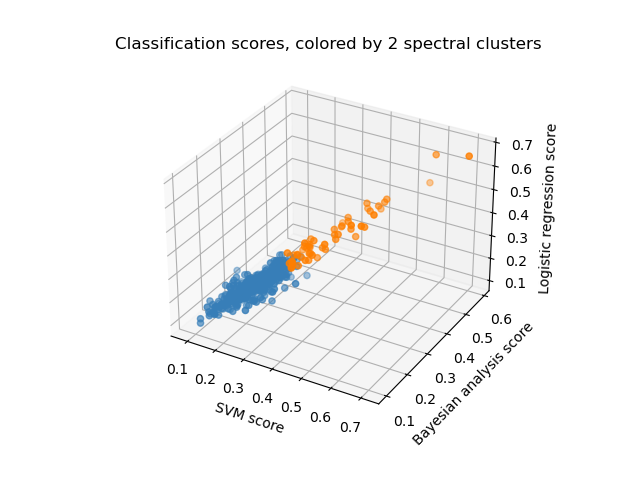

Text(0.5, 0.92, 'Classification scores, colored by 2 spectral clusters')

In [66]:
from mpl_toolkits import mplot3d
#%matplotlib inline
%matplotlib notebook


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pt_n_rate[:,1],neuron_vs_score[:,1],log_reg_scores.iloc[:,2],color=colors[y_pred])#c=log_reg_scores.iloc[:,2], cmap='Greens')
ax.set_xlabel('SVM score')
ax.set_ylabel('Bayesian analysis score')
ax.set_zlabel('Logistic regression score')
ax.set_title('Classification scores, colored by 2 spectral clusters')

In [67]:
%matplotlib inline

### agglomerative clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
clustering = AgglomerativeClustering(n_clusters=3,).fit(SVM_vs_bayes)
y_pred = clustering.labels_.astype(int)

In [34]:
len(y_pred)

529

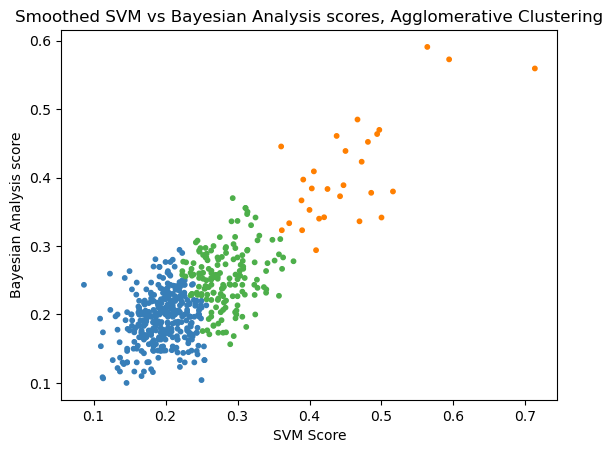

In [35]:
plt.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1],s=10, color=colors[y_pred])
plt.title('Smoothed SVM vs Bayesian Analysis scores, Agglomerative Clustering')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
plt.show()

### Birch clustering

In [26]:
from sklearn.cluster import Birch

In [27]:
brc = Birch(n_clusters=2).fit(SVM_vs_bayes)
y_pred = brc.predict(SVM_vs_bayes)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (2). Decrease the threshold.
  warnings.warn(


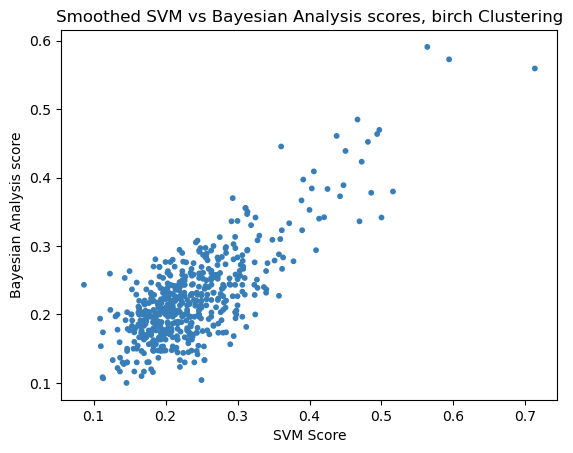

In [28]:
plt.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=10, color=colors[y_pred])
plt.title('Smoothed SVM vs Bayesian Analysis scores, birch Clustering')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
plt.show()

### Gaussian mixture

In [29]:
from sklearn.mixture import GaussianMixture

In [30]:
gm = GaussianMixture(n_components=2, covariance_type="full", random_state=0).fit(SVM_vs_bayes)
y_pred = gm.predict(SVM_vs_bayes)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


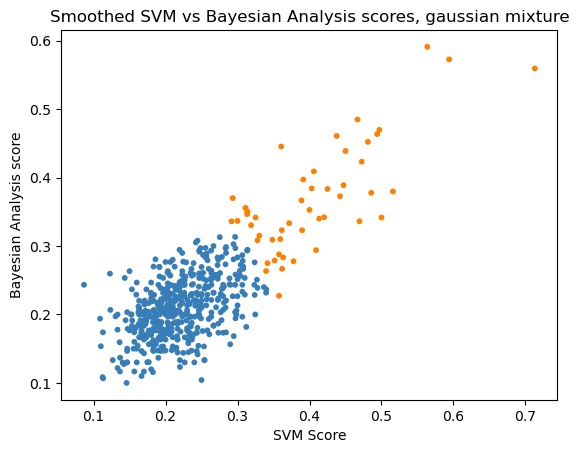

In [31]:
plt.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=10, color=colors[y_pred])
plt.title('Smoothed SVM vs Bayesian Analysis scores, gaussian mixture')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
plt.show()

In [32]:
529-sum(y_pred)

479

### T-SNE

In [33]:
from sklearn import datasets, manifold

In [49]:
X_embedded = manifold.TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(svm_bayes_logreg)
X_embedded.shape

(529, 2)

In [50]:
X_embedded[0]

array([-0.56117594, 46.55257   ], dtype=float32)

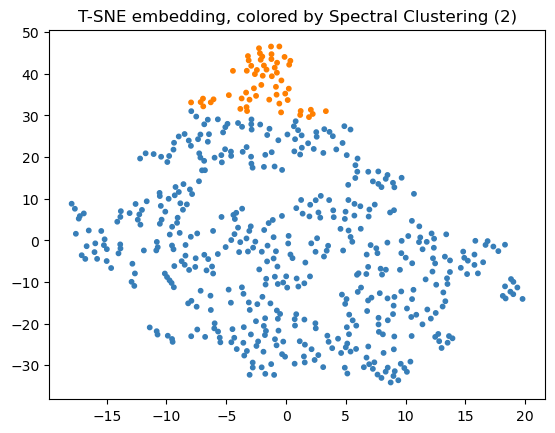

In [51]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=10,color=colors[y_pred])
plt.title('T-SNE embedding, colored by Spectral Clustering (2)')
#plt.xlabel('SVM Score')
#plt.ylabel('Bayesian Analysis score')
plt.show()

### kmeans


In [37]:
from sklearn.cluster import KMeans

In [38]:
#weights: sum of squared scores
weight = [SVM_vs_bayes[i, 0]**2 + SVM_vs_bayes[i, 1]** 2 for i in range(len(SVM_vs_bayes))]

In [39]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(SVM_vs_bayes,sample_weight = weight)
y_pred = kmeans.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


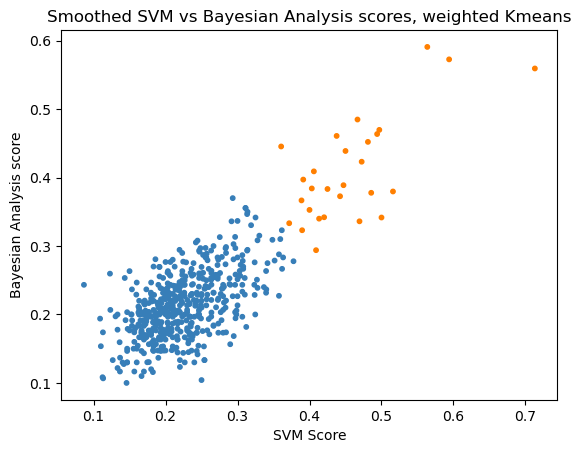

In [40]:
plt.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=10, color=colors[y_pred])
plt.title('Smoothed SVM vs Bayesian Analysis scores, weighted Kmeans')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(SVM_vs_bayes)
y_pred = kmeans.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


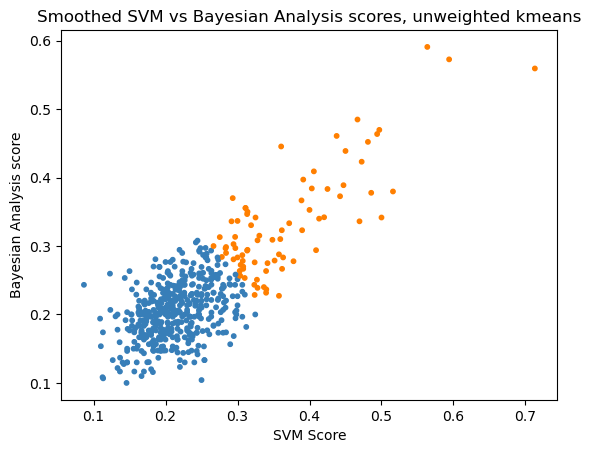

In [42]:
plt.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=10, color=colors[y_pred])
plt.title('Smoothed SVM vs Bayesian Analysis scores, unweighted kmeans')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
plt.show()

In [55]:
cluster_2_ID = [cluster_2[0][i] for i in range(len(cluster_2[0]))]

In [56]:
cluster_2_ID

[0,
 14,
 15,
 28,
 40,
 42,
 44,
 49,
 51,
 56,
 58,
 59,
 137,
 219,
 297,
 305,
 308,
 314,
 315,
 348,
 351,
 354,
 355,
 357,
 358,
 362,
 366,
 367,
 369,
 370,
 376,
 377,
 380,
 384,
 386,
 388,
 433,
 458,
 463,
 467,
 475,
 476,
 478,
 483,
 499,
 508,
 516,
 517,
 518,
 520,
 522,
 523,
 525]

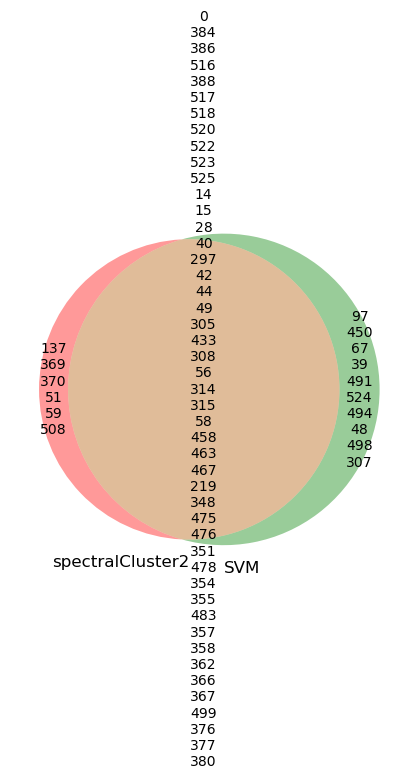

In [58]:
from matplotlib_venn import venn2
set1 = set(cluster_2_ID)
set2 = set(a_coding_neurons)

# Calculate the intersections and differences
intersection = set1 & set2
difference1 = set1 - set2
difference2 = set2 - set1

# Create Venn diagram
venn = venn2([set1, set2], ('spectralCluster2', 'SVM'))

# Add labels and title
venn.get_label_by_id('10').set_text('\n'.join(map(str, difference1)))
venn.get_label_by_id('01').set_text('\n'.join(map(str, difference2)))
venn.get_label_by_id('11').set_text('\n'.join(map(str, intersection)))

#plt.title("Venn Diagram of List Similarities and Differences")
plt.show()

In [ ]:
condition_cn = (NvsS[:,1] >= (np.mean(sorted_indicies) + abs(np.std(sorted_indicies))))
cn = NvsS[condition_cn]
len(cn)

In [ ]:
len(bad_neurons)

In [ ]:
len(NvsS[(NvsS[:,1] == 0)])

In [ ]:
NvsS[(NvsS[:,1] == 0)]

In [ ]:
nonzero_results[nonzero_results['Neuron'] == 39]
# count  = # of times this trial showed up in the testing set. 
# values in columns 0-4 show the probability score for this trial 

In [59]:
neuron_svm_trial_scores.shape

(529, 15)

In [64]:
summed_svm_scores = np.sum(neuron_svm_trial_scores, axis = 1)/15

In [67]:
summed_svm_scores

array([0.28695652, 0.2115942 , 0.15942029, 0.19710145, 0.17101449,
       0.19666667, 0.19      , 0.2       , 0.19      , 0.2       ,
       0.18333333, 0.17666667, 0.23      , 0.2       , 0.29855072,
       0.26666667, 0.22608696, 0.24347826, 0.15942029, 0.19130435,
       0.13623188, 0.26376812, 0.23768116, 0.23768116, 0.17391304,
       0.17971014, 0.16811594, 0.26956522, 0.17971014, 0.26666667,
       0.20289855, 0.19130435, 0.19130435, 0.26666667, 0.25151515,
       0.17575758, 0.24545455, 0.19090909, 0.19090909, 0.26666667,
       0.15151515, 0.1969697 , 0.26060606, 0.20909091, 0.3       ,
       0.1969697 , 0.14242424, 0.2       , 0.18333333, 0.23333333,
       0.25666667, 0.18666667, 0.20333333, 0.16333333, 0.16333333,
       0.19333333, 0.23      , 0.21      , 0.22333333, 0.21666667,
       0.21      , 0.14333333, 0.19      , 0.2       , 0.14666667,
       0.19666667, 0.14666667, 0.23333333, 0.27333333, 0.18333333,
       0.24      , 0.18666667, 0.17      , 0.19666667, 0.27666

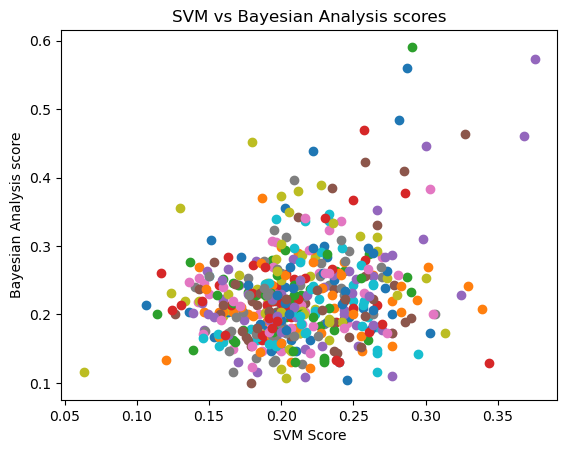

In [68]:
for i in range(529):
    plt.scatter(summed_svm_scores[i],neuron_vs_score[i,1], label=i)
    #label = f"({i})"
    #plt.annotate(label, (input_transformedp[i,0]*100,input_transformedp[i,1]*100), textcoords="offset points", xytext=(0,5),
                # ha='center')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('SVM vs Bayesian Analysis scores')
plt.xlabel('SVM Score')
plt.ylabel('Bayesian Analysis score')
plt.show()

[]

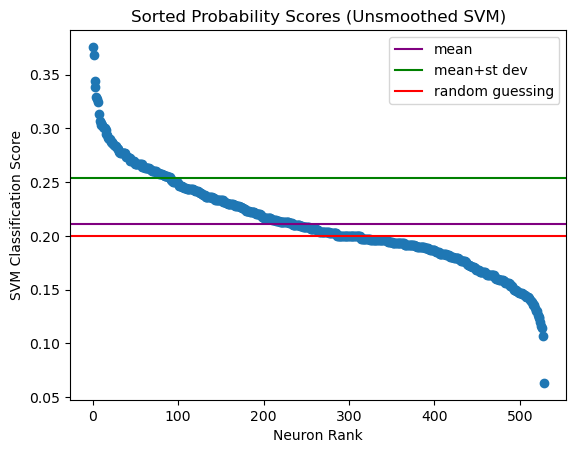

In [90]:
sorted_svm_nosmooth = np.sort(summed_svm_scores[:])[::-1]

plt.scatter((range(len(sorted_svm_nosmooth))),sorted_svm_nosmooth)
plt.title('Sorted Probability Scores (Unsmoothed SVM)')
plt.axhline(y=np.mean(sorted_svm_nosmooth),color='purple', label='mean')
plt.axhline(y=(np.mean(sorted_svm_nosmooth) + abs(np.std(sorted_svm_nosmooth))),color='green', label='mean+st dev')
plt.axhline(y=0.2,color='red', label='random guessing')
plt.xlabel('Neuron Rank')
plt.ylabel('SVM Classification Score')
plt.legend(loc = 'upper right')
plt.plot()